# Assignment 2 ROSETTA in Applied Machine Learning

> Kypritidis Stefanos 8170050 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8170050@aueb.gr


* We start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
from plotnine import *
import matplotlib.pyplot as plt
import scipy.stats.stats as stats
import seaborn as sns

* Next up we read [the results of the study](https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx) and use the sheet of `Country Scores`
* Also, we download the materials as advised in the assignment description and move the folder `Replication Files` to the same folder as this notebook

In [2]:
country_scores = pd.read_excel('https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx', \
                               sheet_name='Country Scores')
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


## Question 1

* We start by reading the necessary file: `WDI_data.csv` which is located in the folder `Replication Files\DATA` that is placed in the same folder as this notebook

In [3]:
income_data = pd.read_csv('Replication Files\DATA\WDI_data.csv', 
                  sep=",", 
                  index_col=False)

* We clear the last 5 rows of the dataframe because they contain irrelevant information.

In [4]:
income_data = income_data.iloc[:-5]

* Next up, we are only interested in the income (called as GDP per capita) when it comes to the`income_data`, meaning we will filter out only the rows with the column `Series` containing `'GDP'`

In [5]:
GDP_data = income_data.loc[income_data['Series Name'].str.contains('GDP')]
GDP_data = GDP_data.reset_index(drop=True)

* Now we are going to create two new datasets. One will contain the country names, country codes, GDP per country and TIMSS scores per country and the other will have the country names, country codes, GDP per country and PIRLS scores per country
* For each dataframe we will only keep the scores (TIMSS/PIRLS) that are not NaN

In [6]:
PIRLS_GDP = pd.merge(GDP_data[['Country Name','Country Code','2015 [YR2015]']], 
               country_scores.loc[country_scores['Median Reading Score (PIRLS Scale, 4th Grade)'].notna()]
               [['Country Code','Median Reading Score (PIRLS Scale, 4th Grade)']], 
               on='Country Code',
               how='inner')
TIMSS_GDP = pd.merge(GDP_data[['Country Name','Country Code','2015 [YR2015]']], 
               country_scores.loc[country_scores['Median Math Score (TIMSS Scale, 4th Grade)'].notna()]
               [['Country Code','Median Math Score (TIMSS Scale, 4th Grade)']], 
               on='Country Code',
               how='inner')
TIMSS_GDP

,Country Name,Country Code,2015 [YR2015],"Median Math Score (TIMSS Scale, 4th Grade)"
0,Argentina,ARG,19101.2973920688,406.652557
1,Armenia,ARM,8195.93364956571,454.000000
2,Australia,AUS,43719.5021648696,520.000000
3,Austria,AUT,44353.8752139122,511.000000
4,Azerbaijan,AZE,16698.8636532538,465.000000
...,...,...,...,...
66,Turkey,TUR,23388.4813019367,477.000000
67,United Arab Emirates,ARE,65975.3755468552,437.000000
68,United States,USA,53029.2933612438,544.000000
69,Uruguay,URY,19831.4458942372,424.912933


* Now we change names for the column: `2015 [YR2015]` , `Median Reading Score (PIRLS Scale, 4th Grade)` and `Median Math Score (TIMSS Scale, 4th Grade)` in the dataframe of PIRLS_GDP and TIMSS_GDP

In [7]:
PIRLS_GDP.rename(columns={'2015 [YR2015]':'GDP',
                         'Median Reading Score (PIRLS Scale, 4th Grade)':'Score'}, 
                        inplace=True)
TIMSS_GDP.rename(columns={'2015 [YR2015]':'GDP',
                         'Median Math Score (TIMSS Scale, 4th Grade)':'Score'}, 
                        inplace=True)

* We transform the columns `GDP` and `Score` from object type to float

In [8]:
PIRLS_GDP['GDP'] = PIRLS_GDP['GDP'].astype(float)
PIRLS_GDP['Score'] = PIRLS_GDP['Score'].astype(float)
TIMSS_GDP['GDP'] = TIMSS_GDP['GDP'].astype(float)
TIMSS_GDP['Score'] = TIMSS_GDP['Score'].astype(float)

* Now we are going to investigate the relationship between logged GDP per Capita and median TIMSS results. We will use the linear regression model to do so

In [9]:
TIMSS_mod = smf.ols("Score ~ np.log(GDP)", data=TIMSS_GDP)
TIMSS_res = TIMSS_mod.fit()
TIMSS_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        13:48:52   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.1170     66.734      0.691      0.492     -87.013     179.247
np.log(GDP)    41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <center> Results <center>
* We observe that $R^2 = 0.352$ which represents the proportion of the variance for the dependent variable (score) that's explained by an independent variable (logged GDP)
* The results of the regression show that the slope is statitically significant ($p = 0.00 < 0.05$) but the intercept is not statistically significant as   $p = 0.492  > 0.05$

* In detail, there is sufficient evidence to conclude a positive linear relationship between the variables of $\log(\mathrm{GDP)}$ and TIMSS results because p-value of the slope ($p = 0.00$) is less than our significance level which in our case is $α = 0.05$ , so we rejects our null hypothesis ($\beta =0 $) and suggests our alternate hypothesis ($\beta \neq 0$) where $\beta$ is the slope of the linear regression line

* For every unit increase in $\log(\mathrm{GDP})$ there will be an increase of 41.746 in the TIMSS results.

* On the other hand, to calculate the increase in the TIMSS results for every unit increase in GDP, we have to investigate the derivative of the linear regression equation. The linear regression equation is: $y = \alpha + \beta x$ . However, we have set x to be the $\log(\mathrm{GDP)}$. As a result, the equation is: $y = \alpha + 41.746 \log(\mathrm{GDP)} $
* Calculating the derivative: $$ y' = \frac{41.746}{(\mathrm{GDP)}} $$
* As a result, we notice that for every unit increase in GDP there is a different increase in the TIMSS results based on the country's current level of GDP. For example if a country has a GDP of $10,000$ , a one unit increase of the GDP would result in an increase of $\frac{41.746}{10000} = 0.00417 $ in the TIMSS results median of that country.
* That means the higher the GDP of a country is, the less will a GDP-increase affect positively the median TIMSS results of that country

#### <center> Plot TIMSS - log(GDP) <center>

* Now we make the plot that showcases the relationship between logged GDP per Capita and median TIMSS results for the countries we have sufficient data on their Math tests results

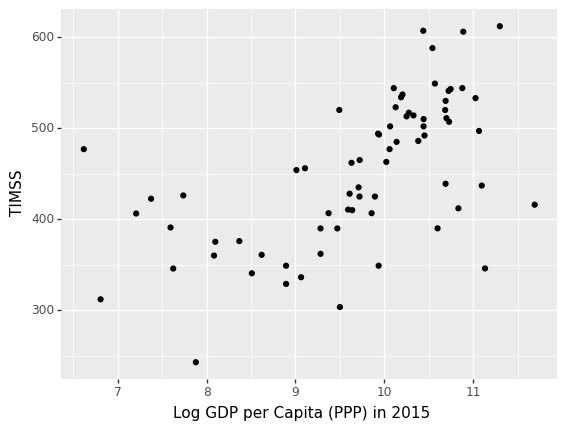

<ggplot: (84685520906)>

In [10]:
ggplot(data=TIMSS_GDP) +\
    geom_point(mapping=aes(x='np.log(GDP)', y='Score')) +\
    labs(y= "TIMSS", x = "Log GDP per Capita (PPP) in 2015")

* Now we are going to investigate the relationship between logged GDP per Capita and median PIRLS results. We will use the linear regression model to do so

In [11]:
PIRLS_mod = smf.ols("Score ~ np.log(GDP)", data=PIRLS_GDP)
PIRLS_res = PIRLS_mod.fit()
PIRLS_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        13:48:52   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      42.6191     57.790      0.737      0.463     -72.762     158.000
np.log(GDP)    43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <center> Results <center>
* We observe that $R^2 = 0.457$   
* The results of the regression show that the slope is statitically significant ($p = 0.00 < 0.05$) but the intercept is not statistically significant as   $p = 0.463  > 0.05$

* In detail, there is sufficient evidence to conclude a positive linear relationship between the variables of $\log(\mathrm{GDP)}$ and PIRLS results because p-value of the slope ($p = 0.00$) is less than our significance level which in our case is $α = 0.05$ , so we rejects our null hypothesis ($\beta =0 $) and suggests our alternate hypothesis ($\beta \neq 0$) where $\beta$ is the slope of the linear regression line.

* For every unit increase in $\log(\mathrm{GDP})$ there will be an increase of 43.9124 in the PIRLS results.

* On the other hand, to calculate the increase in the PIRLS results for every unit increase in GDP, we have to investigate the derivative of the linear regression equation. The linear regression equation is: $y = \alpha + \beta x$ . However, we have set x to be the $\log(\mathrm{GDP)}$. As a result, the equation is: $y = \alpha + 43.9124 \log(\mathrm{GDP)} $
* Calculating the derivative: $$ y' = \frac{43.9124}{(\mathrm{GDP)}} $$
* As a result, we notice that for every unit increase in GDP there is a different increase in the PIRLS results based on the country's current level of GDP. For example if a country has a GDP of 10,000 , a one unit increase of the GDP would result in an increase of $\frac{43.9124}{10000} = 0.00439 $ in the PIRLS results median
* That means the higher the GDP of a country is, the less will a GDP-increase affect positively the median PIRLS results of that country.

#### <center> Plot PIRLS - Log(GDP) <center>
* Now we make the plot that showcases the relationship between logged GDP per Capita and median PIRLS results for different countries that we have sufficient data on their Reading tests results

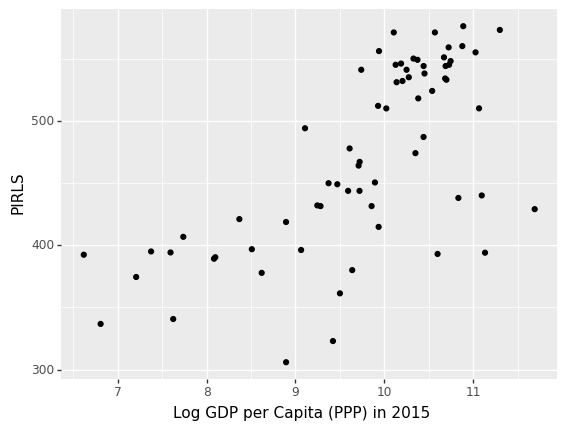

<ggplot: (84685696470)>

In [12]:
ggplot(data=PIRLS_GDP) +\
    geom_point(mapping=aes(x='np.log(GDP)', y='Score')) +\
    labs(y= "PIRLS", x = "Log GDP per Capita (PPP) in 2015")


## Question 2

* We start by reading the necessary file: `BL2013_MF1599_v2.2.dta` which is located in the folder `Replication Files\DATA` that is placed in the same folder as this notebook

In [13]:
schooling_data = pd.read_stata('Replication Files\DATA\BL2013_MF1599_v2.2.dta')

* We only need the average years of schooling data for the year of 2010 so we clear our data

In [14]:
schooling_data = schooling_data.loc[schooling_data['year'] == 2010]

* Now we are going to read the file with the country_codes called `country_codes_V202001.csv.gz` which is located in the same folder as this notebook

In [15]:
country_codes = pd.read_csv('country_codes_V202001.csv.gz', encoding='latin-1')

* Now we create a dataframe `GDP_data_cleared` that will contain only the countries that we have information on either their TIMSS results and GDP data or PIRLS results and GDP data

In [16]:
GDP_data_cleared = pd.merge(TIMSS_GDP[['Country Code','Country Name','GDP']],
                           PIRLS_GDP[['Country Code','Country Name','GDP']],
                           on='Country Code',
                           how='outer')
GDP_data_cleared

,Country Code,Country Name_x,GDP_x,Country Name_y,GDP_y
0,ARG,Argentina,19101.297392,Argentina,19101.297392
1,ARM,Armenia,8195.933650,NaN,NaN
2,AUS,Australia,43719.502165,Australia,43719.502165
3,AUT,Austria,44353.875214,Austria,44353.875214
4,AZE,Azerbaijan,16698.863653,Azerbaijan,16698.863653
...,...,...,...,...,...
73,FRA,NaN,NaN,France,37765.750869
74,IDN,NaN,NaN,Indonesia,10367.695298
75,ISR,NaN,NaN,Israel,32024.352771
76,ZAF,NaN,NaN,South Africa,12362.583814


* Now we have to fix the columns with NaN values. We do that buy creating new columns and checking if the old column values are Nan.

In [17]:
GDP_data_cleared['Country Name'] = np.where(GDP_data_cleared['Country Name_x'].isna(),
                                            GDP_data_cleared['Country Name_y'],
                                            GDP_data_cleared['Country Name_x'])
GDP_data_cleared['GDP'] = np.where(GDP_data_cleared['GDP_x'].isna(),
                                            GDP_data_cleared['GDP_y'],
                                            GDP_data_cleared['GDP_x'])
GDP_data_cleared = GDP_data_cleared[['Country Code','Country Name','GDP']]

* We create a new dataframe that will contain both the information for the GDP per capita and the average schooling years for every country. We join elements with the same country codes.

In [18]:
schooling_data.rename(columns={'WBcode':'Country Code',
                        'country':'Country Name'}, 
                        inplace=True) #renaming column
GDP_school = pd.merge(GDP_data_cleared[['Country Name','Country Code','GDP']], 
               schooling_data[['Country Code','yr_sch']],  
               on='Country Code',
               how='inner')
print(GDP_data_cleared.shape)
GDP_school

(78, 3)


,Country Name,Country Code,GDP,yr_sch
0,Argentina,ARG,19101.297392,9.510379
1,Armenia,ARM,8195.933650,10.726531
2,Australia,AUS,43719.502165,11.541207
3,Austria,AUT,44353.875214,9.603404
4,Bahrain,BHR,43926.474036,7.060835
...,...,...,...,...
67,France,FRA,37765.750869,10.677683
68,Indonesia,IDN,10367.695298,7.611433
69,Israel,ISR,32024.352771,12.320045
70,South Africa,ZAF,12362.583814,9.690252


#### <center> Data clearing <center>
* We see that the `GDP_data_cleared` dataframe has 78 rows. However, the new dataframe has 72 lines. That's why we investigate what happened to the other 6 lines
* We find the elements that are not in the new dataframe `GDP_school`

In [19]:
for x in GDP_data_cleared['Country Code']:
    if x not in list(GDP_school['Country Code']):
        print(GDP_data_cleared.loc[GDP_data_cleared['Country Code'] == x][['Country Name','Country Code']])

  Country Name Country Code
4   Azerbaijan          AZE
   Country Name Country Code
9  Burkina Faso          BFA
   Country Name Country Code
12         Chad          TCD
   Country Name Country Code
24      Georgia          GEO
   Country Name Country Code
46         Oman          OMN
   Country Name Country Code
57       Serbia          SRB


* After some digging up, we find out that there is a problem with the country of Serbia as it is not contained in the `GDP_data`. However, it is contained in `schooling_data` 
* We see that Serbia's `Country Code` is not written correctly

In [20]:
schooling_data.loc[schooling_data['Country Name'] == 'Serbia'][['Country Name','Country Code']]

,Country Name,Country Code
1858,Serbia,SER


* According to the `country_codes` Serbia is written like `SRB`

In [21]:
country_codes.loc[(country_codes['country_name_full'] == 'Serbia')]

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
178,688,Serbia,Serbia,RS,SRB


* Now we are going to update the dataframe `schooling_data` in order to have the correct country code for Serbia

In [22]:
schooling_data.at[1858,'Country Code'] = 'SRB'

* We merge the dataframes as did before

In [23]:
GDP_school = pd.merge(GDP_data_cleared[['Country Name','Country Code','GDP']], 
               schooling_data[['Country Code','yr_sch']], 
               on='Country Code',
               how='inner')
print(schooling_data.shape)
GDP_school

(146, 20)


,Country Name,Country Code,GDP,yr_sch
0,Argentina,ARG,19101.297392,9.510379
1,Armenia,ARM,8195.933650,10.726531
2,Australia,AUS,43719.502165,11.541207
3,Austria,AUT,44353.875214,9.603404
4,Bahrain,BHR,43926.474036,7.060835
...,...,...,...,...
68,France,FRA,37765.750869,10.677683
69,Indonesia,IDN,10367.695298,7.611433
70,Israel,ISR,32024.352771,12.320045
71,South Africa,ZAF,12362.583814,9.690252


We see that we successfully fixed the issue with the Serbia country code

* We transform the columns `GDP` and `yr_sch` from object type to float

In [24]:
GDP_school['yr_sch'] = GDP_school['yr_sch'].astype(float)
GDP_school['GDP'] = GDP_school['GDP'].astype(float)

* Next up, we can try to fit a regression model to see the relationship between the logged per capita GDP in 2015 and the years of schooling

In [25]:
school_mod = smf.ols("yr_sch ~ np.log(GDP)", data=GDP_school)
school_res = school_mod.fit()
school_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           6.33e-16
Time:                        13:48:53   Log-Likelihood:                -141.32
No. Observations:                  73   AIC:                             286.6
Df Residuals:                      71   BIC:                             291.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.0113      1.848     -5.417      0.000     -13.697      -6.326
np.log(GDP)     1.9505      0.187     10.405      0.000       1.577       2.324
==============================================================================
Omnibus:                        8.088   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.492
Skew:                          -0.712   Prob(JB):                       0.0236
Kurtosis:                       3.659   Cond. No.                         92.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <center>Regression results <center>
* We can see there is a R-squared of the amount of $0.604$ which is a relatively satisfying find compared to the question 1 regressions results.
* The results of the regression show that both the slope and the intercept are statitically significant ($p = 0.00 < 0.05$).

* In detail, there is sufficient evidence to conclude a positive linear relationship between the variables of $\log(\mathrm{GDP)}$ and average school years because p-value of the slope ($p = 0.00$) is less than our significance level which in our case is $α = 0.05$ , so we rejects our null hypothesis ($\beta =0 $) and suggests our alternate hypothesis ($\beta \neq 0$) where $\beta$ is the slope of the linear regression line

* For every unit increase in $\log(\mathrm{GDP})$ there will be an increase of 1.9505 in the average school years.

* On the other hand, to calculate the increase in the average school years for every unit increase of GDP, we have to investigate the derivative of the linear regression equation. The linear regression equation is: $y = \alpha + \beta x$ . However, we have set x to be the $\log(\mathrm{GDP)}$. As a result, the equation is: $y = \alpha + 1.9505 \log(\mathrm{GDP)} $
* Calculating the derivative: $$ y' = \frac{1.9505}{(\mathrm{GDP)}} $$
* As a result, we notice that for every unit increase in GDP there is a different increase in the average school years based on the country's current level of GDP. For example if a country has a GDP of $10000$, a one unit increase of the GDP would result in an increase of $\frac{1.9505}{10000} = 0.00019505 $ in the average school years of that country.
* That means the higher the GDP of a country is, the less will a GDP-increase affect positively the average school years of that country.

Here we can see the regression line we found and the different countries observations

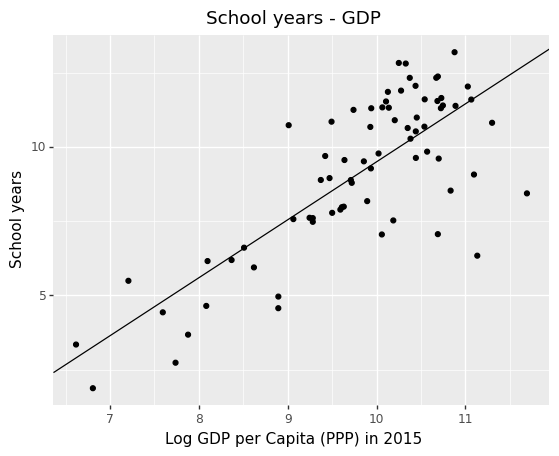

<ggplot: (84685700852)>

In [26]:
ggplot(data=GDP_school) +\
    geom_point(mapping=aes(x='np.log(GDP)', y='yr_sch')) +\
    geom_abline(intercept=school_res.params['Intercept'], 
                slope=school_res.params['np.log(GDP)']) +\
    labs(y= "School years", x = "Log GDP per Capita (PPP) in 2015", title = "School years - GDP")

* We plot the residuals together with the logged GDP per capita (independent variable) and we get a random pattern which is a positive sign for our regression
* The residuals in this case describe the years of schooling that cannot be explained by income.

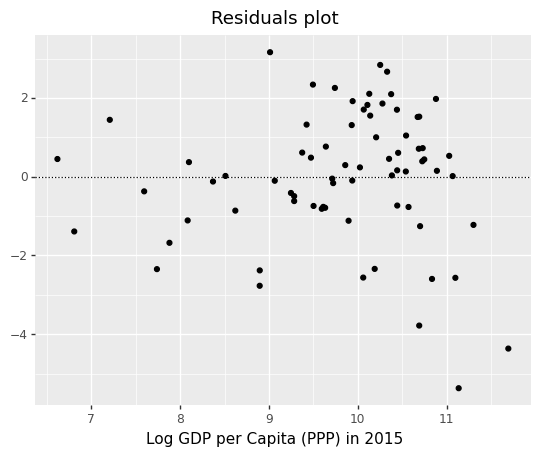

<ggplot: (84685771804)>

In [27]:
ggplot(data=GDP_school) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='np.log(GDP)', y=school_res.resid)) +\
    labs(title='Residuals plot', x='Log GDP per Capita (PPP) in 2015')

* Next up we create a new dataset that contains the school year - GDP regression's residuals together with the country that is connected to the specific residual.

In [28]:
resid_school_GDP = pd.DataFrame() 
resid_school_GDP['Country Code'] = GDP_school['Country Code']
resid_school_GDP['residual'] = school_res.resid
resid_school_GDP

,Country Code,residual
0,ARG,0.294631
1,ARM,3.161134
2,AUS,0.710373
3,AUT,-1.255528
4,BHR,-3.779211
...,...,...
68,FRA,0.132385
69,IDN,-0.412442
70,ISR,2.096397
71,ZAF,1.323130


* Moreover we create a new dataset for each of TIMSS and PIRLS regressions that we calculated in question 1. Each dataset will contain the residuals and the country code that concerns the specific residual.

In [29]:
resid_TIMSS = pd.DataFrame() 
resid_TIMSS['Country Code'] = TIMSS_GDP['Country Code']
resid_TIMSS['residual'] = TIMSS_res.resid
resid_PIRLS = pd.DataFrame() 
resid_PIRLS['Country Code'] = PIRLS_GDP['Country Code']
resid_PIRLS['residual'] = PIRLS_res.resid
resid_TIMSS

,Country Code,residual
0,ARG,-50.975909
1,ARM,31.693559
2,AUS,27.804280
3,AUT,18.202895
4,AZE,12.982843
...,...,...
66,TUR,10.918500
67,ARE,-72.373659
68,USA,43.745211
69,URY,-34.281533


#### <center> Regression TIMSS - Schooling residuals <center>
* Now we can merge the information from the residuals calculated from the regression of school years and logged GDP per capita with the residuals calculated from the regression of TIMSS Tests results and logged GDP per capita

In [30]:
resid_TIMSS = pd.merge(resid_TIMSS, 
               resid_school_GDP, 
               on='Country Code',
               how='inner')
resid_TIMSS

,Country Code,residual_x,residual_y
0,ARG,-50.975909,0.294631
1,ARM,31.693559,3.161134
2,AUS,27.804280,0.710373
3,AUT,18.202895,-1.255528
4,BHR,-53.392883,-3.779211
...,...,...,...
61,TUR,10.918500,-2.560576
62,ARE,-72.373659,-2.566667
63,USA,43.745211,1.975264
64,URY,-34.281533,-1.117396


* We rename the columns so that they have more understanding names

In [31]:
resid_TIMSS.rename(columns={'residual_x': 'test_resid',
                         'residual_y':'school_resid'}, 
                        inplace=True)
resid_TIMSS

,Country Code,test_resid,school_resid
0,ARG,-50.975909,0.294631
1,ARM,31.693559,3.161134
2,AUS,27.804280,0.710373
3,AUT,18.202895,-1.255528
4,BHR,-53.392883,-3.779211
...,...,...,...
61,TUR,10.918500,-2.560576
62,ARE,-72.373659,-2.566667
63,USA,43.745211,1.975264
64,URY,-34.281533,-1.117396


* Now we are going to run a regression to investigate the relationship between the TIMSS residuals and the school residuals

In [32]:
TIMSS_resid_mod = smf.ols("test_resid ~ school_resid", data=resid_TIMSS)
TIMSS_resid_res = TIMSS_resid_mod.fit()
TIMSS_resid_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             test_resid   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     31.63
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           4.40e-07
Time:                        13:48:53   Log-Likelihood:                -355.67
No. Observations:                  66   AIC:                             715.3
Df Residuals:                      64   BIC:                             719.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5373      6.637      0.382      0.704     -10.722      15.797
school_resid    21.9227      3.898      5.624      0.000      14.136      29.710
==============================================================================
Omnibus:                        2.819   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.991
Skew:                           0.364   Prob(JB):                        0.370
Kurtosis:                       3.441   Cond. No.                         1.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <center> Results <center>

* We can see $R^2 = 0.331$ , which is slightly better than the one written in the paper ($0.32$).
* The results of the regression show that the slope is statitically significant ($p = 0.00 < 0.05$) but the intercept is not statistically significant as   $p = 0.704  > 0.05$

* In detail, there is sufficient evidence to conclude a positive linear relationship between the TIMSS residuals and the schooling residuals because p-value of the slope ($p = 0.00$) is less than our significance level which in our case is $α = 0.05$ , so we rejects our null hypothesis ($\beta =0 $) and suggests our alternate hypothesis ($\beta \neq 0$) where $\beta$ is the slope of the linear regression line.

* For every unit increase in the schooling residuals there will be an increase of $21.9227$ in the residuals of the TIMSS results.
* That means , for every one year increase in the average country's schooling years which are not connected to its GDP per Capita, there will be an increase of $21.9227$ in the country's median TIMSS results which are not connected to its GDP per Capita. To sum it up, every unit increase in the schooling years will result in an increase of $21.9227$ in the median TIMSS results independently of how rich the country is.

#### <center> Charts <center>
* Here we showcase the plot that features the TIMSS and school residuals for each country that we have sufficient data for
* We can see that there is one extra point drawn (close to the top right corner for $x= 2.3$ and $y=78$) because of the correction of the country code of Serbia

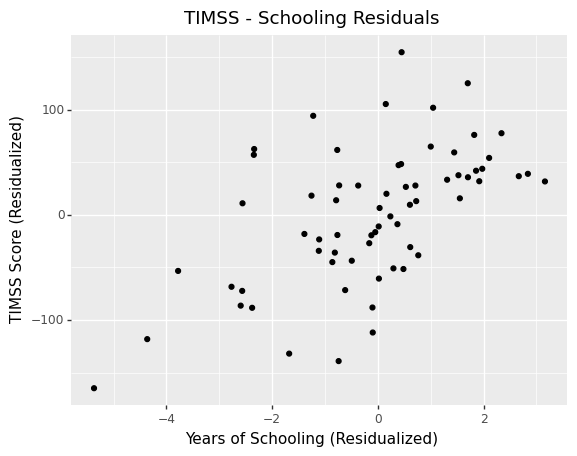

<ggplot: (84685724609)>

In [33]:
ggplot(data=resid_TIMSS) +\
    geom_point(mapping=aes(x='school_resid', y='test_resid'))+\
    labs(y= "TIMSS Score (Residualized)", x = "Years of Schooling (Residualized)",title='TIMSS - Schooling Residuals')

* Also, here we can see the residuals that come up from the regression of the TIMSS and schooliing residuals
* We see there is a random pattern which is positive sign for our regression.

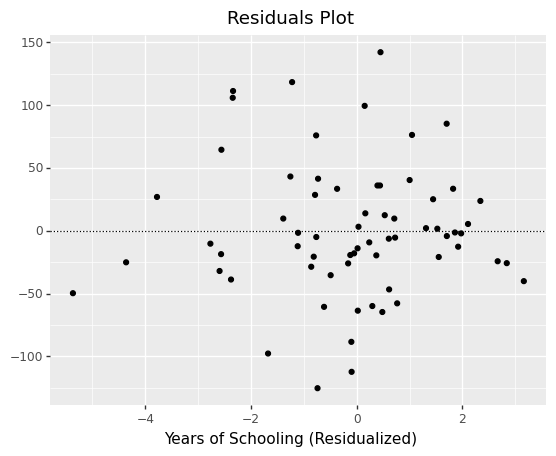

<ggplot: (84685892428)>

In [34]:
ggplot(data=resid_TIMSS) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='school_resid', y=TIMSS_resid_res.resid))+\
    labs(title='Residuals Plot', x='Years of Schooling (Residualized)')

####  <center> Regression PIRLS - Schooling residuals <center>
* Now we can merge the information from the residuals calculated from the regression of school years and logged GDP per capita with the residuals calculated from the regression of PIRLS Tests results and logged GDP per capita

In [35]:
resid_PIRLS = pd.merge(resid_PIRLS, 
               resid_school_GDP, 
               on='Country Code',
               how='inner')
resid_PIRLS

,Country Code,residual_x,residual_y
0,ARG,-44.042720,0.294631
1,AUS,22.152588,0.710373
2,AUT,20.519995,-1.255528
3,BEN,18.086246,-0.371518
4,BWA,-85.903688,0.764805
...,...,...,...
58,TGO,15.377204,1.444614
59,TTO,-23.149715,0.454157
60,ARE,-89.916813,-2.566667
61,USA,39.675288,1.975264


* Now we are going to run a regression to investigate the relationship between the PIRLS residuals and the school residuals

In [36]:
resid_PIRLS.rename(columns={'residual_x': 'test_resid',
                        'residual_y':'school_resid'}, 
                        inplace=True)
PIRLS_resid_mod = smf.ols("test_resid ~ school_resid", data=resid_PIRLS)
PIRLS_resid_res = PIRLS_resid_mod.fit()
PIRLS_resid_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             test_resid   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.99
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           2.25e-07
Time:                        13:48:54   Log-Likelihood:                -326.37
No. Observations:                  63   AIC:                             656.7
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3509      5.507      0.245      0.807      -9.661      12.363
school_resid    20.2575      3.475      5.830      0.000      13.310      27.205
==============================================================================
Omnibus:                       14.627   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.402
Skew:                          -0.842   Prob(JB):                     2.25e-05
Kurtosis:                       5.306   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <center> Results <center>

* We can see $R^2=0.358$, like the paper writes.
* The results of the regression show that the slope is statitically significant ($p = 0.00 < 0.05$) but the intercept is not statistically significant as   $p = 0.807  > 0.05$

* In detail, there is sufficient evidence to conclude a positive linear relationship between the PIRLS residuals and the schooling residuals because p-value of the slope ($p = 0.00$) is less than our significance level which in our case is $α = 0.05$ , so we rejects our null hypothesis ($\beta =0 $) and suggests our alternate hypothesis ($\beta \neq 0$) where $\beta$ is the slope of the linear regression line.

* For every unit increase in the schooling residuals there will be an increase of $20.2575$ in the residuals of the PIRLS results.
    
* That means , for every one year increase in the average country's schooling years which are not connected to its GDP per Capita, there will be an increase of $20.2575$ in the country's median PIRLS results which are not connected to its GDP per Capita. To sum it up, every unit increase in the schooling years will result in an increase of $20.2575$ in the median PIRLS results independently of how rich the country is.

#### <center> Charts <center>
* Here we showcase the plot that features the PIRLS and schooling residuals for each country that we have sufficient data for

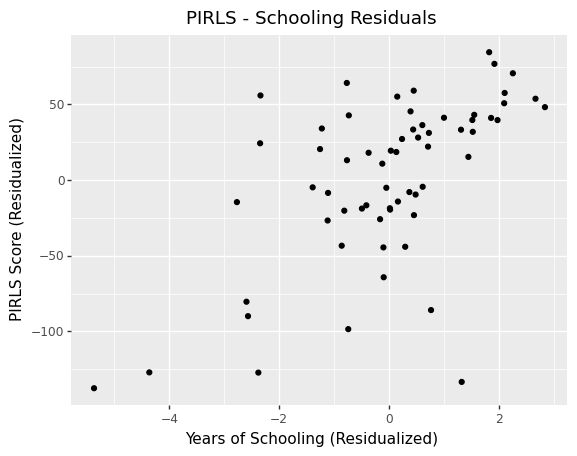

<ggplot: (84685821510)>

In [37]:
ggplot(data=resid_PIRLS) +\
    geom_point(mapping=aes(x='school_resid', y='test_resid')) +\
    labs(y= "PIRLS Score (Residualized)", x = "Years of Schooling (Residualized)", title='PIRLS - Schooling Residuals')

* We can see the residuals that come up from the regression of the PIRLS and schooling residuals
* We see there is a random pattern which is positive sign for our regression.

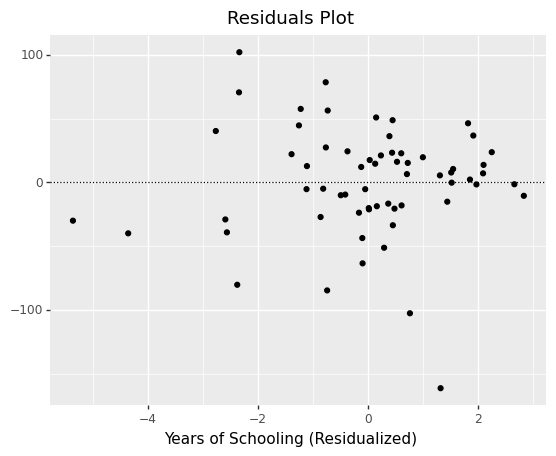

<ggplot: (84685851784)>

In [38]:
ggplot(data=resid_PIRLS) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='school_resid', y=PIRLS_resid_res.resid))+\
    labs(title='Residuals Plot', x='Years of Schooling (Residualized)')

## Question 3

* We start by reading the necessary file: `HLO Panel Data (mean, thresh) - Jan 2018.dta` which is located in the folder `Replication Files\DATA` that is placed in the same folder as this notebook

In [39]:
learn_outcomes = pd.read_stata('Replication Files\DATA\HLO Panel Data (mean, thresh) - Jan 2018.dta')

* After, we clear our data only to include thresholds that are available
* We also update the name of the country code column

In [40]:
learn_outcomes = learn_outcomes.loc[learn_outcomes['low_threshold'].notna()]
learn_outcomes.rename(columns={'cntabb':'Country Code'}, 
                        inplace=True)

* Next up we want to keep for every country the most recent threshold meaning the most up to date percentage of subjects above the 400 mark
* We do that by selecting the max year and grouping by in the same time

In [41]:
learn_outcomes = learn_outcomes[learn_outcomes.groupby(['Country Code'])['year'].transform(max) == learn_outcomes['year']]

* We create two new different dataframes that include only the available values for the `Percent Above Math Benchmark (400 on TIMSS Scale)` and `Percent Above Reading Benchmark (400 on PIRLS Scale)` respectively

In [42]:
country_threshold_TIMSS = country_scores[['Country Code','Percent Above Math Benchmark (400 on TIMSS Scale)']]
country_threshold_PIRLS = country_scores[['Country Code','Percent Above Reading Benchmark (400 on PIRLS Scale)']]
country_threshold_TIMSS = country_threshold_TIMSS.loc[country_threshold_TIMSS \
                                                      ['Percent Above Math Benchmark (400 on TIMSS Scale)'].notna()]
country_threshold_PIRLS = country_threshold_PIRLS.loc[country_threshold_PIRLS \
                                                      ['Percent Above Reading Benchmark (400 on PIRLS Scale)'].notna()]

* Now we are going to connect the information of the different dataframes
* We get one dataframe that contains each country code, the percentage of subjects above the 400 mark from the world bank estimates and the percent above benchmark on TIMSS
* Also we get one dataframe that contains each country code, the percentage of subjects above the 400 mark from the world bank estimates and the percent above benchmark on PIRLS

In [43]:
TIMSS_thresholds  =  pd.merge(learn_outcomes[['Country Code','low_threshold']], 
               country_threshold_TIMSS, 
               on='Country Code',
               how='inner')
PIRLS_thresholds =  pd.merge(learn_outcomes[['Country Code','low_threshold']], 
               country_threshold_PIRLS, 
               on='Country Code',
               how='inner')

* It is time to investigate the new and the previous estimates, by running a Spearman test between the new estimates for TIMSS and the previous estimates, and similarly for PIRLS. 

In [44]:
print('Spearman for TIMSS', stats.spearmanr(TIMSS_thresholds['low_threshold'],+\
                                TIMSS_thresholds['Percent Above Math Benchmark (400 on TIMSS Scale)']))
print('Spearman for PIRLS', stats.spearmanr(PIRLS_thresholds['low_threshold'],+\
                                PIRLS_thresholds['Percent Above Reading Benchmark (400 on PIRLS Scale)']))

Spearman for TIMSS SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)
Spearman for PIRLS SpearmanrResult(correlation=0.9045173418249431, pvalue=5.2905847721937165e-25)


#### <center> Results <center>
* The Spearman correlation coefficients between the TIMSS and PIRLS scales and the existing World Bank measures are approximatelly $0.897$ for maths and $0.905$ for reading.
* Both test results show a very strong positive linear correlation if we take into account that a value of $+1$ shows a total positive linear correlation.
* That means that the new estimates for TIMSS and the previous estimates are directly associated with each other (as it should be). Same applies for PIRLS and the previous estimates.

####  <center> Plots <center>
* Now we present the plots in order to compare the new and the previous estimates for TIMSS and PIRLS

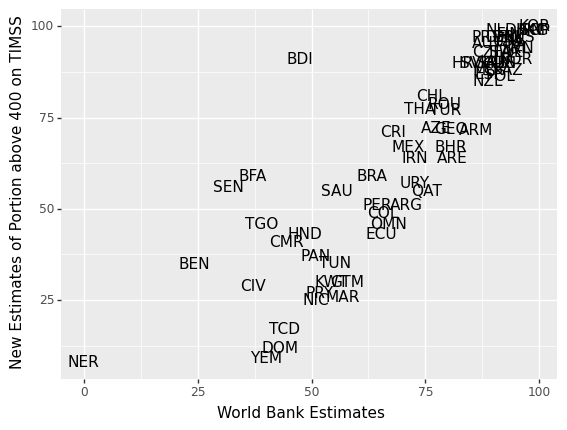

<ggplot: (84685910438)>

In [45]:
ggplot(TIMSS_thresholds, aes(x= 'low_threshold', y= 'Percent Above Math Benchmark (400 on TIMSS Scale)'))+\
  geom_text(aes(label=TIMSS_thresholds['Country Code']),nudge_x = 0, nudge_y = 0) +\
  labs(y= "New Estimates of Portion above 400 on TIMSS", x = "World Bank Estimates")

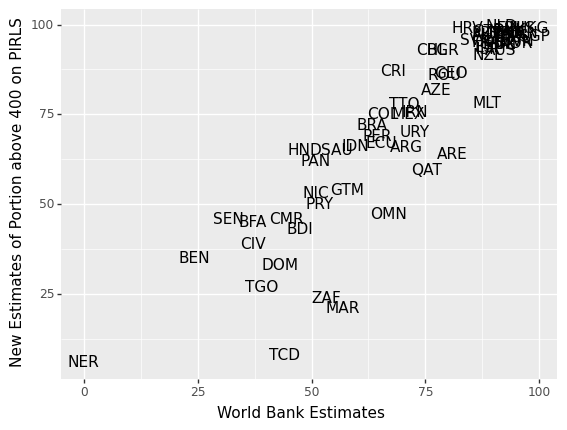

<ggplot: (84685903276)>

In [46]:
ggplot(PIRLS_thresholds, aes(x= 'low_threshold', y= 'Percent Above Reading Benchmark (400 on PIRLS Scale)'))+\
    geom_text(aes(label=PIRLS_thresholds['Country Code']),nudge_x = 0, nudge_y = 0) +\
    labs(y= "New Estimates of Portion above 400 on PIRLS", x = "World Bank Estimates")

## Question 4

 We start by reading all the required data according to the assignment description:
* `usa_00001.csv.gz` which is located in the same folder as this notebook

* `cw_ind2000_ind1990ddx.dta`which is located in the folder `Replication Files\DATA` that is placed in the same folder as this notebook

* `BACI_HS17_Y2018_V202001.csv.gz`which is located in the same folder as this notebook

* `cw_hs6_sic87dd.dta` which is located in the folder `Replication Files\DATA` that is placed in the same folder as this notebook

* `cw_sic87_ind1990ddx.dta` which is located in the folder `Replication Files\DATA` that is placed in the same folder as this notebook

In [47]:
usa_graduates = pd.read_csv('usa_00001.csv.gz', encoding='latin-1')
industry_map = pd.read_stata('Replication Files\DATA\cw_ind2000_ind1990ddx.dta')
export_records = pd.read_csv('BACI_HS17_Y2018_V202001.csv.gz', encoding='latin-1')
std_ind_codes = pd.read_stata('Replication Files\DATA\cw_hs6_sic87dd.dta')
ind_codes_map = pd.read_stata('Replication Files\DATA\cw_sic87_ind1990ddx.dta')

* Now we are going to identify college and high school graduates from the `usa_graduates` dataframe. The rules are that college graduates have at least 10 years of education and high school graduates have at least 6 years of education.

In [48]:
college_graduates = usa_graduates.loc[usa_graduates['EDUC'] >= 10]
hschool_graduates = usa_graduates.loc[usa_graduates['EDUC'] >= 6]

Now we will calculate the percentage of college graduates per industry
* We start by groupping by industry to get the sum amount of people per industry
* We also groupby industry to get the sum amount of college graduates per industry

In [49]:
industry_people = usa_graduates[['IND','PERWT']].groupby(['IND']).sum() #we groupby industry to get the sum amount of people per industry
industry_people = industry_people.reset_index() 
industry_college = college_graduates[['IND','PERWT']].groupby(['IND']).sum()#we groupby industry to get the sum amount of college graduates per industry
industry_college = industry_college.reset_index() 

* Now we merge the datasets calculated
* Also we calculate the percentage of college graduates per industry
* We rename the column name of `PERWT`

In [50]:
industry_info_col = pd.merge(industry_college,
               industry_people, 
               on='IND',
               how='left') 
industry_info_col['PERWT'] = industry_info_col['PERWT_x'] / industry_info_col['PERWT_y'] # calculating the percentage of college graduates per industry
college_avg = industry_info_col[['IND','PERWT']].copy()
college_avg.rename(columns={'PERWT':'College_grad'}, 
                        inplace=True)
college_avg

,IND,College_grad
0,0,0.047222
1,17,0.095859
2,18,0.098101
3,19,0.314682
4,27,0.053740
...,...,...
260,977,0.197541
261,978,0.196749
262,979,0.310720
263,987,0.232645


Now we will calculate the percentage of high school graduates per industry
* We also groupby industry to get the sum amount of high school graduates per industry

In [51]:
industry_highschool = hschool_graduates[['IND','PERWT']].groupby(['IND']).sum()
industry_highschool = industry_highschool.reset_index()

* Next up we merge the datasets of sum amount of people per industry and sum amount of high school graduates per industry
* Also we calculate the percentage of high school graduates per industry
* We also rename the column `PERWT`

In [52]:
industry_info_hs = pd.merge(industry_highschool, 
               industry_people, 
               on='IND',
               how='left') #we join the datases we calculated
industry_info_hs['PERWT'] = industry_info_hs['PERWT_x'] / industry_info_hs['PERWT_y'] # calculating the percentage of high school graduates per industry
hs_avg = industry_info_hs[['IND','PERWT']].copy()
hs_avg.rename(columns={'PERWT':'Highschool_grad'}, 
                        inplace=True)
hs_avg

,IND,Highschool_grad
0,0,0.261273
1,17,0.579874
2,18,0.714349
3,19,0.924096
4,27,0.766916
...,...,...
261,977,0.988685
262,978,0.903607
263,979,0.967142
264,987,0.965357


* Now we merge the information to the percentage of college graduates and  high school graduates for each industry and we save it in a new dataframe called `skills_intensity_industry`

In [53]:
skills_intensity_industry = pd.merge(college_avg, 
               hs_avg, 
               on='IND',
               how='outer')
skills_intensity_industry

,IND,College_grad,Highschool_grad
0,0,0.047222,0.261273
1,17,0.095859,0.579874
2,18,0.098101,0.714349
3,19,0.314682,0.924096
4,27,0.053740,0.766916
...,...,...,...
261,978,0.196749,0.903607
262,979,0.310720,0.967142
263,987,0.232645,0.965357
264,992,0.067478,0.462692


* Now we have to reweight `skills_intensity_industry` because the industry codes for 1990 are not the same with the ones of 2000. We will use `industry_map` ( file: `cw_ind2000_ind1990ddx.dta`) to do so
* First, we create a dataframe that contains all the information of `industry_map` and `skills_intensity_industry`

In [54]:
merged_industry_data = pd.merge(industry_map, 
               skills_intensity_industry, 
               left_on='ind2000', right_on='IND',
               how='left')
merged_industry_data

,ind2000,ind1990ddx,weight,IND,College_grad,Highschool_grad
0,17,10,0.994016,17,0.095859,0.579874
1,17,31,0.002637,17,0.095859,0.579874
2,17,121,0.001740,17,0.095859,0.579874
3,17,561,0.001607,17,0.095859,0.579874
4,18,11,0.990907,18,0.098101,0.714349
...,...,...,...,...,...,...
707,957,922,0.009144,957,0.377846,0.954899
708,957,931,0.983767,957,0.377846,0.954899
709,959,700,0.038986,959,0.326841,0.985124
710,959,910,0.041877,959,0.326841,0.985124


* Now we are going to reweight the weighted averages with the corresponding weight in each mapping 
* We are going to do that by calculating the weighted averages of percentages of college and high-school graduates but we will group by `ind1990ddx`

In [55]:
def weighted_average(column):
  return lambda x : np.average(x[column], weights = x.weight) #function to calculate weighted average

grouped_industry90 =  merged_industry_data.groupby('ind1990ddx') #first we group by industry 1990
new_college_avg = grouped_industry90.apply(weighted_average('College_grad'))
new_hs_avg = grouped_industry90.apply(weighted_average('Highschool_grad'))

* Now we fix again `new_college_avg` and `new_hs_avg` because they are not dataframes but Series objects

In [56]:
new_college_avg = new_college_avg.to_frame()
new_college_avg = new_college_avg.reset_index()
new_college_avg.rename(columns={0:'College_grad'}, 
                        inplace=True)

new_hs_avg = new_hs_avg.to_frame()
new_hs_avg = new_hs_avg.reset_index()
new_hs_avg.rename(columns={0:'Highschool_grad'}, 
                        inplace=True)
new_college_avg

,ind1990ddx,College_grad
0,10,0.112103
1,11,0.098101
2,20,0.215322
3,31,0.288329
4,32,0.168029
...,...,...
217,921,0.350704
218,922,0.448058
219,930,0.517643
220,931,0.382556


* Again we merge the information to have the reweighted percentages of college graduates and high school graduates for each industry and we save it in the dataframe called `skills_intensity_industry`

In [57]:
skills_intensity_industry = pd.merge(new_college_avg,
               new_hs_avg, 
               on='ind1990ddx',
               how='outer')
skills_intensity_industry.rename(columns={'ind1990ddx':'industry'}, 
                        inplace=True)
skills_intensity_industry

,industry,College_grad,Highschool_grad
0,10,0.112103,0.604262
1,11,0.098101,0.714349
2,20,0.215322,0.774062
3,31,0.288329,0.881899
4,32,0.168029,0.622458
...,...,...,...
217,921,0.350704,0.990417
218,922,0.448058,0.960262
219,930,0.517643,0.964986
220,931,0.382556,0.953539


##### Export records
* Now we are going to fix the issues of the `export_records` file 

In [58]:
export_records

,t,i,j,k,v,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


As described, we need to map the HS 6-digit code to the industry codes we are using in the rest of the data
* Firstly, with the `cw_hs6_sic87dd.dta` we map the HS 6-digit code with Standard Industrial Codes (SIC) SIC87 industry codes.
* We do that by merging the data of the exports and the industry codes on the HS 6-digit code.

In [59]:
export_records_ext = pd.merge(export_records,
               std_ind_codes[['hs6','sic87dd','share']], 
               left_on='k',
               right_on='hs6',
               how='left')
export_records_ext

,t,i,j,k,v,q,hs6,sic87dd,share
0,2018,4,24,845420,101.397000,26.000000,845420.0,3321.0,0.636426
1,2018,4,24,845420,101.397000,26.000000,845420.0,3559.0,0.363574
2,2018,4,24,848180,2.328000,0.007000,848180.0,3491.0,0.004934
3,2018,4,24,848180,2.328000,0.007000,848180.0,3494.0,0.995066
4,2018,4,31,570110,1.596000,0.037000,570110.0,2273.0,1.000000
...,...,...,...,...,...,...,...,...,...
10344809,2018,894,842,960190,76.858000,5.075000,960190.0,3999.0,1.000000
10344810,2018,894,842,970190,4.519000,0.214000,970190.0,9200.0,1.000000
10344811,2018,894,842,970500,93.706896,2.786751,970500.0,9200.0,1.000000
10344812,2018,894,854,100510,2.141000,0.412000,100510.0,115.0,1.000000


* Next up, we adjust the value of the trade flow of the BACI file with the `share` column of `cw_hs6_sic87dd.dta` meaning creating a new column with the multiplication of columns `v` and `share`

In [60]:
export_records_ext['Upd_value'] = export_records_ext['v'] * export_records_ext['share']
export_records_ext

,t,i,j,k,v,q,hs6,sic87dd,share,Upd_value
0,2018,4,24,845420,101.397000,26.000000,845420.0,3321.0,0.636426,64.531708
1,2018,4,24,845420,101.397000,26.000000,845420.0,3559.0,0.363574,36.865292
2,2018,4,24,848180,2.328000,0.007000,848180.0,3491.0,0.004934,0.011486
3,2018,4,24,848180,2.328000,0.007000,848180.0,3494.0,0.995066,2.316514
4,2018,4,31,570110,1.596000,0.037000,570110.0,2273.0,1.000000,1.596000
...,...,...,...,...,...,...,...,...,...,...
10344809,2018,894,842,960190,76.858000,5.075000,960190.0,3999.0,1.000000,76.858000
10344810,2018,894,842,970190,4.519000,0.214000,970190.0,9200.0,1.000000,4.519000
10344811,2018,894,842,970500,93.706896,2.786751,970500.0,9200.0,1.000000,93.706896
10344812,2018,894,854,100510,2.141000,0.412000,100510.0,115.0,1.000000,2.141000


* Here we group the trade flow by exporter and SIC87 industry code, so that we have the total value per exporter and industry.

In [61]:
trade_flow = export_records_ext[['sic87dd','i','Upd_value']].groupby(['sic87dd','i']).sum()
trade_flow = trade_flow.reset_index()
trade_flow

,sic87dd,i,Upd_value
0,112.0,31,8.024000
1,112.0,32,1348.391771
2,112.0,36,466.484000
3,112.0,40,149.945440
4,112.0,48,87.404000
...,...,...,...
67623,9900.0,854,1.367014
67624,9900.0,858,68292.376958
67625,9900.0,860,388.753000
67626,9900.0,862,42769.604000


* Now we will map the SIC87 industry codes to the 1990 census industry codes by joining the file `cw_sic87_ind1990ddx.dta` to our just edited dataframe `trade_flow`

In [62]:
trade_flow.rename(columns={'sic87dd':'sic87'}, 
                        inplace=True)
grouped_trade_flow = pd.merge(trade_flow,
               ind_codes_map,
               on='sic87',
               how='inner')
grouped_trade_flow.rename(columns={'i':'country_code',
                        'ind1990ddx':'industry'}, 
                        inplace=True)
grouped_trade_flow

,sic87,country_code,Upd_value,industry
0,112.0,31,8.024000,10
1,112.0,32,1348.391771,10
2,112.0,36,466.484000,10
3,112.0,40,149.945440,10
4,112.0,48,87.404000,10
...,...,...,...,...
67047,3999.0,860,1556.644573,390
67048,3999.0,862,293.485894,390
67049,3999.0,882,268.716940,390
67050,3999.0,887,3.891072,390


* Now we will use `country_codes_V202001.csv` in order to transform the ISO 3-digit country codes to three letter country codes.
* We do so by merging the dataframes `trade_flow` with `country_codes`
* We will have a dataframe called `exports` which contains for each country, the value of its exports, per industry

In [63]:
exports = pd.merge(grouped_trade_flow, 
               country_codes[['country_code','iso_3digit_alpha']], 
               on='country_code',
               how='inner')
exports

,sic87,country_code,Upd_value,industry,iso_3digit_alpha
0,112.0,31,8.024000,10,AZE
1,115.0,31,52.160484,10,AZE
2,119.0,31,2312.346783,10,AZE
3,131.0,31,80377.093494,10,AZE
4,132.0,31,12685.514992,10,AZE
...,...,...,...,...,...
67047,3825.0,876,1.522000,371,WLF
67048,3827.0,876,9.546000,372,WLF
67049,3841.0,876,18.447892,372,WLF
67050,3845.0,876,0.887108,372,WLF


*  Now we can join the `exports` `DataFrame` with the `skills_intensity_industry` `DataFrame` so that we get for each country, value of exports per industry and the percentages of high school graduates and college graduates

In [64]:
country_data = pd.merge(exports, 
               skills_intensity_industry, 
               on='industry',
               how='inner')
country_data

,sic87,country_code,Upd_value,industry,iso_3digit_alpha,College_grad,Highschool_grad
0,112.0,31,8.024000,10,AZE,0.112103,0.604262
1,115.0,31,52.160484,10,AZE,0.112103,0.604262
2,119.0,31,2312.346783,10,AZE,0.112103,0.604262
3,131.0,31,80377.093494,10,AZE,0.112103,0.604262
4,132.0,31,12685.514992,10,AZE,0.112103,0.604262
...,...,...,...,...,...,...,...
67047,3764.0,757,79.489008,362,CHE,0.499685,0.968757
67048,3764.0,804,143.978577,362,UKR,0.499685,0.968757
67049,3764.0,818,4390.530260,362,EGY,0.499685,0.968757
67050,3764.0,598,927.477211,362,PNG,0.499685,0.968757


#### TIMSS results regressions
* Firstly, we only select the countries of the dataframe `country_scores` that have available TIMSS scores.
* Now we merge the above data with the median TIMSS for each country
* Lastly, we rename the columns of the new merged dataframe

In [65]:
cleared_TIMSS = country_scores.loc[country_scores['Median Math Score (TIMSS Scale, 4th Grade)'].notna()].copy()
cleared_TIMSS.rename(columns={'Country Code':'iso_3digit_alpha'},
                        inplace=True)
country_data_TIMSS = pd.merge(country_data, 
               cleared_TIMSS[['iso_3digit_alpha','Median Math Score (TIMSS Scale, 4th Grade)']], 
               on='iso_3digit_alpha',
               how='inner')
country_data_TIMSS.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)':'test_score',
                        'iso_3digit_alpha':'country'}, 
                        inplace=True)
country_data_TIMSS

,sic87,country_code,Upd_value,industry,country,College_grad,Highschool_grad,test_score
0,112.0,31,8.024000,10,AZE,0.112103,0.604262,465.000000
1,115.0,31,52.160484,10,AZE,0.112103,0.604262,465.000000
2,119.0,31,2312.346783,10,AZE,0.112103,0.604262,465.000000
3,131.0,31,80377.093494,10,AZE,0.112103,0.604262,465.000000
4,132.0,31,12685.514992,10,AZE,0.112103,0.604262,465.000000
...,...,...,...,...,...,...,...,...
27485,3944.0,108,1.346000,390,BDI,0.165724,0.774197,476.978455
27486,3949.0,108,11.461000,390,BDI,0.165724,0.774197,476.978455
27487,3991.0,108,1.358647,390,BDI,0.165724,0.774197,476.978455
27488,3999.0,108,0.029288,390,BDI,0.165724,0.774197,476.978455


* We update `Upd_value` in order for it to contain the logged value of exports 
* We devide `test_score` by $1000$ as instructed
* We transform `industry` to string in order to use it as a dummy variable afterwards

In [66]:
country_data_TIMSS['Upd_value'] = np.log(country_data_TIMSS['Upd_value'])
country_data_TIMSS['test_score'] = country_data_TIMSS['test_score']/1000
country_data_TIMSS['industry'] = country_data_TIMSS['industry'].map(str)
country_data_TIMSS

,sic87,country_code,Upd_value,industry,country,College_grad,Highschool_grad,test_score
0,112.0,31,2.082437,10,AZE,0.112103,0.604262,0.465000
1,115.0,31,3.954325,10,AZE,0.112103,0.604262,0.465000
2,119.0,31,7.746018,10,AZE,0.112103,0.604262,0.465000
3,131.0,31,11.294485,10,AZE,0.112103,0.604262,0.465000
4,132.0,31,9.448216,10,AZE,0.112103,0.604262,0.465000
...,...,...,...,...,...,...,...,...
27485,3944.0,108,0.297137,390,BDI,0.165724,0.774197,0.476978
27486,3949.0,108,2.438950,390,BDI,0.165724,0.774197,0.476978
27487,3991.0,108,0.306489,390,BDI,0.165724,0.774197,0.476978
27488,3999.0,108,-3.530567,390,BDI,0.165724,0.774197,0.476978


* We create two different dataframe: one for regression of TIMMS results and College graduate percentage and one for the TIMMS results and high school graduate percentage
* We also pick for each new dataframe only the columns of the 3 letter country codes, the 1990 industry codes, the value of exports, the education graduate percentages  and the median TIMSS scores

In [67]:
country_data_TIMSS_coll = country_data_TIMSS[['country','industry','Upd_value','College_grad','test_score']]
country_data_TIMSS_hs = country_data_TIMSS[['country','industry','Upd_value','Highschool_grad','test_score']]
country_data_TIMSS_coll

,country,industry,Upd_value,College_grad,test_score
0,AZE,10,2.082437,0.112103,0.465000
1,AZE,10,3.954325,0.112103,0.465000
2,AZE,10,7.746018,0.112103,0.465000
3,AZE,10,11.294485,0.112103,0.465000
4,AZE,10,9.448216,0.112103,0.465000
...,...,...,...,...,...
27485,BDI,390,0.297137,0.165724,0.476978
27486,BDI,390,2.438950,0.165724,0.476978
27487,BDI,390,0.306489,0.165724,0.476978
27488,BDI,390,-3.530567,0.165724,0.476978


* Because the industry codes and the country codes are categorical variables, we use dummies in order to use those values in the regression

In [68]:
country_data_TIMSS_coll = pd.get_dummies(country_data_TIMSS_coll, drop_first=True)
country_data_TIMSS_hs = pd.get_dummies(country_data_TIMSS_hs, drop_first=True)
country_data_TIMSS_coll

,Upd_value,College_grad,test_score,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEN,...,industry_370,industry_371,industry_372,industry_380,industry_381,industry_390,industry_40,industry_41,industry_42,industry_50
0,2.082437,0.112103,0.465000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.954325,0.112103,0.465000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.746018,0.112103,0.465000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.294485,0.112103,0.465000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.448216,0.112103,0.465000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27485,0.297137,0.165724,0.476978,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
27486,2.438950,0.165724,0.476978,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
27487,0.306489,0.165724,0.476978,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
27488,-3.530567,0.165724,0.476978,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


* Now we create a string to contain all columns names, in order to use that in the upcoming regression command `smf.ols`

In [69]:
#function that returns the right-formula for parameter:formula in smf.ols
#inputs are : @df : dataframe name and @column the differianted column name
def fix_formula(df , column): 
    counter=0
    power_terms=''
    formula=''
    for x in list(df.columns.values):
        if (counter>2):
            power_terms = power_terms + ' + ' + x
        counter  = counter+1
    return('Upd_value ~ '+ column +': test_score' + power_terms)


formula_TIMSS_college = fix_formula(country_data_TIMSS_coll,'College_grad')
formula_TIMSS_hs = fix_formula(country_data_TIMSS_hs,'Highschool_grad')        

#### Regression with College average graduates and TIMSS test scores
Finally we can start the regression for: $$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$
* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree 

In [70]:
TIMSS_coll_mod = smf.ols(formula=formula_TIMSS_college, data=country_data_TIMSS_coll)
TIMSS_coll_res = TIMSS_coll_mod.fit()
TIMSS_coll_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Upd_value   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     281.4
Date:                Wed, 23 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:49:06   Log-Likelihood:                -62983.
No. Observations:               27490   AIC:                         1.263e+05
Df Residuals:                   27338   BIC:                         1.275e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   9.4189      0.169     55.786      0.000       9.088       9.750
College_grad:test_score    25.4885      2.093     12.178      0.000      21.386      29.591
country_ARG                -2.2235      0.164    -13.587      0.000      -2.544      -1.903
country_ARM                -5.5213      0.169    -32.684      0.000      -5.852      -5.190
country_AUS                -0.9592      0.165     -5.804      0.000      -1.283      -0.635
country_AUT                 0.2094      0.165      1.272      0.204      -0.113       0.532
country_AZE                -5.9228      0.171    -34.720      0.000      -6.257      -5.588
country_BDI                -9.2105      0.246    -37.492      0.000      -9.692      -8.729
country_BEN                -8.4619      0.206    -41.055      0.000      -8.866      -8.058
country_BFA                -8.3771      0.191    -43.779      0.000      -8.752      -8.002
country_BHR                -3.9071      0.166    -23.509      0.000      -4.233      -3.581
country_BRA                -0.3144      0.163     -1.931      0.054      -0.633       0.005
country_CHL                -2.4054      0.164    -14.706      0.000      -2.726      -2.085
country_CIV                -4.6768      0.170    -27.548      0.000      -5.010      -4.344
country_CMR                -6.5909      0.177    -37.269      0.000      -6.938      -6.244
country_COG                -7.2280      0.195    -37.120      0.000      -7.610      -6.846
country_COL                -2.2504      0.164    -13.720      0.000      -2.572      -1.929
country_CRI                -3.6708      0.164    -22.322      0.000      -3.993      -3.348
country_CZE                 0.1499      0.165      0.911      0.362      -0.173       0.473
country_DEU                 2.3830      0.166     14.398      0.000       2.059       2.707
country_DNK                -0.5231      0.167     -3.141      0.002      -0.850      -0.197
country_DOM                -4.1966      0.174    -24.076      0.000      -4.538      -3.855
country_ECU                -4.3841      0.167    -26.324      0.000      -4.711      -4.058
country_ESP                 1.1483      0.163      7.034      0.000       0.828       1.468
country_FIN                -1.5111      0.167     -9.039      0.000      -1.839      -1.183
country_GEO                -5.6924      0.168    -33.835      0.000      -6.022      -5.363
country_GTM                -3.9510      0.169    -23.372      0.000      -4.282      -3.620
country_HKG                -1.2893      0.173     -7.453      0.000      -1.628      -0.950
country_HND                -4.7925      0.173    -27.665      0.000      -5.132      -4.453
country_HRV                -1.9881      0.164    -12.116      0.000      -2.310      -1.667
country_HUN                -0.5653      0.166  

#### <center> Results<center>
* We observe that $Adjusted R^2$ has a value of $0.606$, which is relatively satisfying as  $R^2$ takes values between $0$ and $1$. We use $Adjusted R^2$ to compare because plain $R^2$ monotonically increases with the number of independent variables.
* Also, the $intercept$ that is found has the value of $9.4189$ and is statistically significant because $P = 0.0 <0.05$. That means for a specific country's industry if the percentage of employees in the industry with at least a college degree and the median TIMSS score of the country are both 0 (impossible), then   $log(V_{ci}) = 9.4189 +25.4885\times 0+...+1+...+1 +...+0...= 11.4189$     
And the value of export trade for that specific country's industry:   $$V_{ci}=e^{11.4189}= 91025.958$$
* In most cases there will be two 1s in the regression equation that represent the specific country and industry. However, there is a chance that there will be no 1 or one 1 in the equation so $log(V_{ci}) = 9.4189$ or $log(V_{ci}) = 10.4189$ which happens because we got $k - 1$ dummy variables for the categorical attribute of `industry` (that has $k=70$ different values) and $k' - 1$ dummy variables for the categorical attribute of `country` (that has $k'=82$ different values). Thus the sum amount of columns are $153 = (70-1)+(82-1)+3$, where the $3$ are the non-dummy variables.

#### Regression with High-School average graduates and TIMSS test scores
Finally we can start the regression for: $$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$
* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree 

In [71]:
TIMSS_hs_mod = smf.ols(formula=formula_TIMSS_hs, data=country_data_TIMSS_hs)
TIMSS_hs_res = TIMSS_hs_mod.fit()
TIMSS_hs_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Upd_value   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     285.7
Date:                Wed, 23 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:49:07   Log-Likelihood:                -62858.
No. Observations:               27490   AIC:                         1.260e+05
Df Residuals:                   27338   BIC:                         1.273e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.5478      0.523      1.048      0.295      -0.477       1.573
Highschool_grad:test_score    38.9298      1.949     19.977      0.000      35.110      42.750
country_ARG                   -1.3894      0.170     -8.195      0.000      -1.722      -1.057
country_ARM                   -5.9891      0.170    -35.184      0.000      -6.323      -5.655
country_AUS                   -3.2445      0.209    -15.533      0.000      -3.654      -2.835
country_AUT                   -1.8264      0.200     -9.130      0.000      -2.219      -1.434
country_AZE                   -6.6931      0.175    -38.185      0.000      -7.037      -6.350
country_BDI                  -10.3009      0.252    -40.844      0.000     -10.795      -9.807
country_BEN                   -7.2152      0.217    -33.256      0.000      -7.640      -6.790
country_BFA                   -7.9856      0.192    -41.640      0.000      -8.362      -7.610
country_BHR                   -3.9641      0.165    -23.956      0.000      -4.288      -3.640
country_BRA                    0.4130      0.167      2.471      0.013       0.085       0.741
country_CHL                   -3.1208      0.168    -18.604      0.000      -3.450      -2.792
country_CIV                   -2.5664      0.207    -12.416      0.000      -2.972      -2.161
country_CMR                   -4.9085      0.200    -24.532      0.000      -5.301      -4.516
country_COG                   -5.0994      0.228    -22.321      0.000      -5.547      -4.652
country_COL                   -0.9525      0.179     -5.325      0.000      -1.303      -0.602
country_CRI                   -3.4275      0.164    -20.865      0.000      -3.749      -3.106
country_CZE                   -1.9691      0.203     -9.712      0.000      -2.366      -1.572
country_DEU                   -0.1769      0.219     -0.808      0.419      -0.606       0.252
country_DNK                   -3.3843      0.231    -14.635      0.000      -3.837      -2.931
country_DOM                   -0.5268      0.270     -1.950      0.051      -1.056       0.003
country_ECU                   -3.0960      0.181    -17.109      0.000      -3.451      -2.741
country_ESP                   -0.2002      0.179     -1.116      0.264      -0.552       0.151
country_FIN                   -4.5948      0.241    -19.102      0.000      -5.066      -4.123
country_GEO                   -6.2155      0.170    -36.549      0.000      -6.549      -5.882
country_GTM                   -1.5375      0.216     -7.106      0.000      -1.962      -1.113
country_HKG                   -5.9443      0.314    -18.947      0.000      -6.559      -5.329
country_HND                   -3.1249      0.196    -15.919      0.000      -3.510      -2.740
country_HRV                   -3.5289      

#### <center> Results<center>
* We observe that $Adjusted R^2$ has a value of $0.61$, which is satisfying. We use $Adjusted R^2$ to compare because plain $R^2$ monotonically increases with the number of independent variables (we see that $Adjusted R^2$ and $R^2$ have different values.)
* Also, the $intercept$ that is found has the value of $0.5478$ and is not statitically significant because $P = 0.295 > 0.05$

#### PIRLS
* Firstly, we only select the countries of the dataframe country_scores that have available PIRLS scores.
* Now we merge the above data with the median PIRLS for each country
* Lastly, we rename the columns of the new merged dataframe

In [72]:
cleared_PIRLS = country_scores.loc[country_scores['Median Reading Score (PIRLS Scale, 4th Grade)'].notna()].copy()
cleared_PIRLS.rename(columns={'Country Code':'iso_3digit_alpha'}, 
                        inplace=True)
country_data_PIRLS = pd.merge(country_data, 
               cleared_PIRLS[['iso_3digit_alpha','Median Reading Score (PIRLS Scale, 4th Grade)']], 
               on='iso_3digit_alpha',
               how='inner')
country_data_PIRLS.rename(columns={'Median Reading Score (PIRLS Scale, 4th Grade)':'test_score',
                        'iso_3digit_alpha':'country'}, 
                        inplace=True)
country_data_PIRLS

,sic87,country_code,Upd_value,industry,country,College_grad,Highschool_grad,test_score
0,112.0,31,8.024000,10,AZE,0.112103,0.604262,467.000000
1,115.0,31,52.160484,10,AZE,0.112103,0.604262,467.000000
2,119.0,31,2312.346783,10,AZE,0.112103,0.604262,467.000000
3,131.0,31,80377.093494,10,AZE,0.112103,0.604262,467.000000
4,132.0,31,12685.514992,10,AZE,0.112103,0.604262,467.000000
...,...,...,...,...,...,...,...,...
26396,3944.0,108,1.346000,390,BDI,0.165724,0.774197,392.374207
26397,3949.0,108,11.461000,390,BDI,0.165724,0.774197,392.374207
26398,3991.0,108,1.358647,390,BDI,0.165724,0.774197,392.374207
26399,3999.0,108,0.029288,390,BDI,0.165724,0.774197,392.374207


* We update `Upd_value` in order for it to contain the logged value of exports 
* We devide `test_score` by $1000$ as instructed
* We transform `industry` to string in order to use it as a dummy variable afterwards

In [73]:
country_data_PIRLS['Upd_value'] = np.log(country_data_PIRLS['Upd_value'])
country_data_PIRLS['test_score'] = country_data_PIRLS['test_score']/1000
country_data_PIRLS['industry'] = country_data_PIRLS['industry'].map(str)
country_data_PIRLS

,sic87,country_code,Upd_value,industry,country,College_grad,Highschool_grad,test_score
0,112.0,31,2.082437,10,AZE,0.112103,0.604262,0.467000
1,115.0,31,3.954325,10,AZE,0.112103,0.604262,0.467000
2,119.0,31,7.746018,10,AZE,0.112103,0.604262,0.467000
3,131.0,31,11.294485,10,AZE,0.112103,0.604262,0.467000
4,132.0,31,9.448216,10,AZE,0.112103,0.604262,0.467000
...,...,...,...,...,...,...,...,...
26396,3944.0,108,0.297137,390,BDI,0.165724,0.774197,0.392374
26397,3949.0,108,2.438950,390,BDI,0.165724,0.774197,0.392374
26398,3991.0,108,0.306489,390,BDI,0.165724,0.774197,0.392374
26399,3999.0,108,-3.530567,390,BDI,0.165724,0.774197,0.392374


* We create two different dataframe: one for regression of PIRLS results and College graduate percentage and one for the PIRLS results and high school graduate percentage
* We also pick for each new dataframe only the columns of the 3 letter country codes, the 1990 industry codes, the value of exports, the education graduate percentages and the median PIRLS scores

In [74]:
country_data_PIRLS_coll = country_data_PIRLS[['country','industry','Upd_value','College_grad','test_score']]
country_data_PIRLS_hs = country_data_PIRLS[['country','industry','Upd_value','Highschool_grad','test_score']]
country_data_PIRLS_coll

,country,industry,Upd_value,College_grad,test_score
0,AZE,10,2.082437,0.112103,0.467000
1,AZE,10,3.954325,0.112103,0.467000
2,AZE,10,7.746018,0.112103,0.467000
3,AZE,10,11.294485,0.112103,0.467000
4,AZE,10,9.448216,0.112103,0.467000
...,...,...,...,...,...
26396,BDI,390,0.297137,0.165724,0.392374
26397,BDI,390,2.438950,0.165724,0.392374
26398,BDI,390,0.306489,0.165724,0.392374
26399,BDI,390,-3.530567,0.165724,0.392374


* Because the industry codes and the country codes are categorical variables, we use dummies in order to use those values in the regression

In [75]:
country_data_PIRLS_coll = pd.get_dummies(country_data_PIRLS_coll, drop_first=True)
country_data_PIRLS_hs = pd.get_dummies(country_data_PIRLS_hs, drop_first=True)
country_data_PIRLS_coll

,Upd_value,College_grad,test_score,country_ARG,country_AUS,country_AUT,country_AZE,country_BDI,country_BEN,country_BFA,...,industry_370,industry_371,industry_372,industry_380,industry_381,industry_390,industry_40,industry_41,industry_42,industry_50
0,2.082437,0.112103,0.467000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.954325,0.112103,0.467000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.746018,0.112103,0.467000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.294485,0.112103,0.467000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.448216,0.112103,0.467000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,0.297137,0.165724,0.392374,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
26397,2.438950,0.165724,0.392374,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
26398,0.306489,0.165724,0.392374,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
26399,-3.530567,0.165724,0.392374,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


* Now we create a string to contain all columns names, in order to use that in the upcoming regression command `smf.ols`

In [76]:
formula_PIRLS_college = fix_formula(country_data_PIRLS_coll,'College_grad')
formula_PIRLS_hs = fix_formula(country_data_PIRLS_hs,'Highschool_grad')#we call the function we made before

#### Regression with College average graduates and PIRLS test scores
Finally we can start the regression for: $$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$
* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree 

In [77]:
PIRLS_coll_mod = smf.ols(formula=formula_PIRLS_college, data=country_data_PIRLS_coll)
PIRLS_coll_res = PIRLS_coll_mod.fit()
PIRLS_coll_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Upd_value   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     285.4
Date:                Wed, 23 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:49:07   Log-Likelihood:                -60214.
No. Observations:               26401   AIC:                         1.207e+05
Df Residuals:                   26252   BIC:                         1.219e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   9.5881      0.173     55.281      0.000       9.248       9.928
College_grad:test_score    23.4059      2.293     10.209      0.000      18.912      27.900
country_ARG                -2.3168      0.162    -14.330      0.000      -2.634      -2.000
country_AUS                -0.9738      0.165     -5.904      0.000      -1.297      -0.650
country_AUT                 0.1617      0.165      0.982      0.326      -0.161       0.485
country_AZE                -5.9047      0.169    -34.966      0.000      -6.236      -5.574
country_BDI                -8.8362      0.244    -36.287      0.000      -9.313      -8.359
country_BEN                -8.4723      0.204    -41.500      0.000      -8.872      -8.072
country_BFA                -8.2573      0.190    -43.414      0.000      -8.630      -7.884
country_BGR                -1.5760      0.165     -9.526      0.000      -1.900      -1.252
country_BRA                -0.4393      0.161     -2.730      0.006      -0.755      -0.124
country_CAN                 0.4158      0.166      2.503      0.012       0.090       0.741
country_CHL                -2.5652      0.164    -15.661      0.000      -2.886      -2.244
country_CIV                -4.8019      0.167    -28.744      0.000      -5.129      -4.474
country_CMR                -6.6563      0.175    -38.085      0.000      -6.999      -6.314
country_COG                -7.3097      0.192    -37.986      0.000      -7.687      -6.933
country_COL                -2.4828      0.162    -15.366      0.000      -2.800      -2.166
country_CRI                -3.8500      0.163    -23.566      0.000      -4.170      -3.530
country_CZE                 0.0494      0.166      0.297      0.766      -0.276       0.375
country_DEU                 2.3722      0.165     14.339      0.000       2.048       2.697
country_DNK                -0.5441      0.167     -3.256      0.001      -0.872      -0.217
country_DOM                -4.4524      0.169    -26.358      0.000      -4.784      -4.121
country_ECU                -4.5469      0.164    -27.709      0.000      -4.869      -4.225
country_ESP                 1.0532      0.163      6.446      0.000       0.733       1.373
country_FIN                -1.5467      0.168     -9.185      0.000      -1.877      -1.217
country_FRA                 1.4336      0.164      8.752      0.000       1.113       1.755
country_GEO                -5.8206      0.168    -34.718      0.000      -6.149      -5.492
country_GTM                -4.2360      0.165    -25.705      0.000      -4.559      -3.913
country_HKG                -1.1033      0.169     -6.521      0.000      -1.435      -0.772
country_HND                -4.9713      0.170    -29.177      0.000      -5.305      -4.637
country_HRV                -2.1981      0.167  

#### <center> Results<center>
* We observe that $Adjusted R^2$ has a value of $0.615$, which is satisfying as  $R^2$ takes values between $0$ and $1$. We use $Adjusted R^2$ to compare because plain $R^2$ monotonically increases with the number of independent variables.
* Also, the $intercept$ that is found has the value of $9.5881$ and is statitically significant because $P = 0.0 <0.05$

#### Regression with High-School average graduates and PIRLS test scores
Finally we can start the regression for: $$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$
* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree 

In [78]:
PIRLS_hs_mod = smf.ols(formula=formula_PIRLS_hs, data=country_data_PIRLS_hs)
PIRLS_hs_res = PIRLS_hs_mod.fit()
PIRLS_hs_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Upd_value   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     287.7
Date:                Wed, 23 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:49:08   Log-Likelihood:                -60148.
No. Observations:               26401   AIC:                         1.206e+05
Df Residuals:                   26252   BIC:                         1.218e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.1801      0.571      3.818      0.000       1.061       3.299
Highschool_grad:test_score    33.0873      2.156     15.347      0.000      28.861      37.313
country_ARG                   -2.1199      0.162    -13.091      0.000      -2.437      -1.803
country_AUS                   -3.1463      0.230    -13.654      0.000      -3.598      -2.695
country_AUT                   -1.9861      0.229     -8.671      0.000      -2.435      -1.537
country_AZE                   -6.5290      0.175    -37.368      0.000      -6.871      -6.187
country_BDI                   -7.7673      0.256    -30.365      0.000      -8.269      -7.266
country_BEN                   -7.4357      0.218    -34.129      0.000      -7.863      -7.009
country_BFA                   -7.2313      0.205    -35.323      0.000      -7.633      -6.830
country_BGR                   -3.9091      0.239    -16.337      0.000      -4.378      -3.440
country_BRA                   -0.5235      0.161     -3.259      0.001      -0.838      -0.209
country_CAN                   -2.1490      0.252     -8.513      0.000      -2.644      -1.654
country_CHL                   -4.1813      0.203    -20.623      0.000      -4.579      -3.784
country_CIV                   -3.6310      0.188    -19.309      0.000      -4.000      -3.262
country_CMR                   -5.5249      0.194    -28.520      0.000      -5.905      -5.145
country_COG                   -5.8438      0.221    -26.403      0.000      -6.278      -5.410
country_COL                   -2.6895      0.162    -16.611      0.000      -3.007      -2.372
country_CRI                   -4.7231      0.175    -26.926      0.000      -5.067      -4.379
country_CZE                   -2.4919      0.251     -9.923      0.000      -2.984      -2.000
country_DEU                   -0.0308      0.243     -0.127      0.899      -0.507       0.446
country_DNK                   -3.2925      0.264    -12.492      0.000      -3.809      -2.776
country_DOM                   -2.6365      0.216    -12.204      0.000      -3.060      -2.213
country_ECU                   -4.3533      0.164    -26.494      0.000      -4.675      -4.031
country_ESP                   -0.7490      0.211     -3.551      0.000      -1.162      -0.336
country_FIN                   -4.5745      0.281    -16.300      0.000      -5.125      -4.024
country_FRA                   -0.5072      0.218     -2.328      0.020      -0.934      -0.080
country_GEO                   -7.0681      0.191    -36.961      0.000      -7.443      -6.693
country_GTM                   -3.7475      0.168    -22.261      0.000      -4.077      -3.418
country_HKG                   -4.2474      0.288    -14.742      0.000      -4.812      -3.683
country_HND                   -4.5386      

#### <center> Results<center>
* We observe that $Adjusted R^2 = 0.616$, which is satisfying.
* Furthermore, the $intercept$ that is found has the value of $2.1801$ and is statitically significant because $P = 0.0 < 0.05$